In [1]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
df1 = pd.read_csv('Ev Market/ev_charger_dataset.csv')
df1.head()
     

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [3]:
df2 = pd.read_csv('Ev Market/ev_market_india_dataset.csv')
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


# Exploratory Data Analysis (EDA)


#some basic steps while analysising datsets  for better understanding of datasets
#getting shape
#info()
#describe()


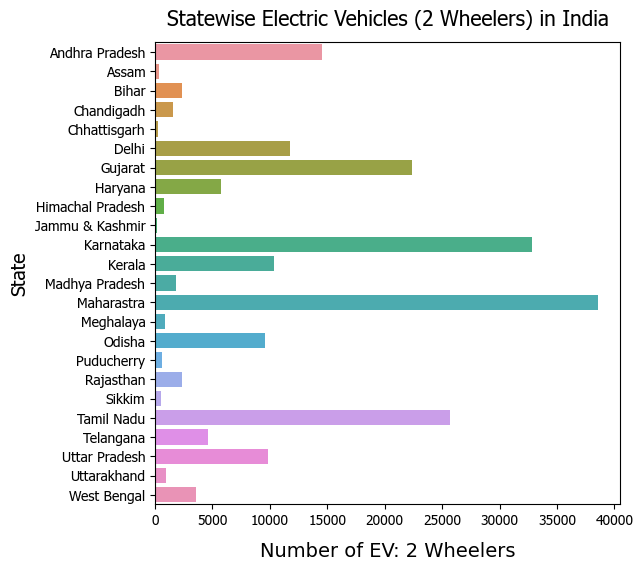

<Figure size 640x480 with 0 Axes>

In [4]:
#ploting bargraphs for better understanding of the data
# 2 wheelers data visualization from first dataset
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W')
plt.ylabel('State', fontsize=14, family="Tahoma")
plt.xlabel('Number of EV: 2 Wheelers', fontsize=14, labelpad=10)
plt.xticks(family='Tahoma')
plt.yticks(family='Tahoma')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='Tahoma', size=15, pad=12)
plt.show()
plt.savefig('2 wheelers.png')

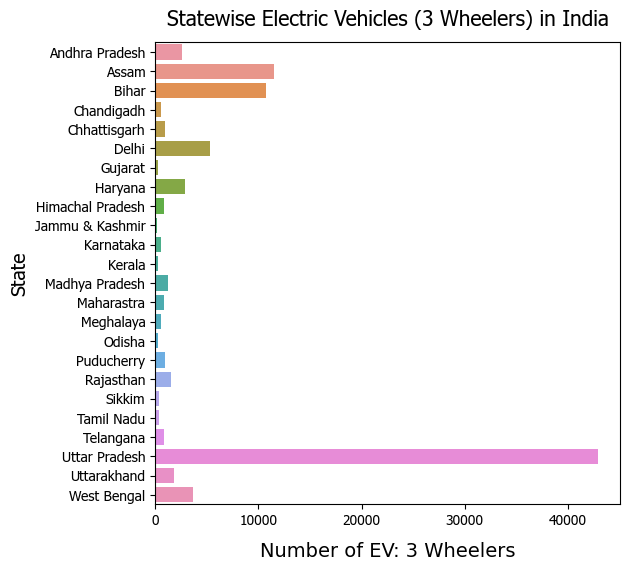

<Figure size 640x480 with 0 Axes>

In [5]:
# 3 wheelers data visualization from first dataset
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W')
plt.ylabel('State', fontsize=14, family="Tahoma")
plt.xlabel('Number of EV: 3 Wheelers', fontsize=14, labelpad=10)
plt.xticks(family='Tahoma')
plt.yticks(family='Tahoma')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='Tahoma', size=15, pad=12)
plt.show()
plt.savefig('3 wheelers.png')

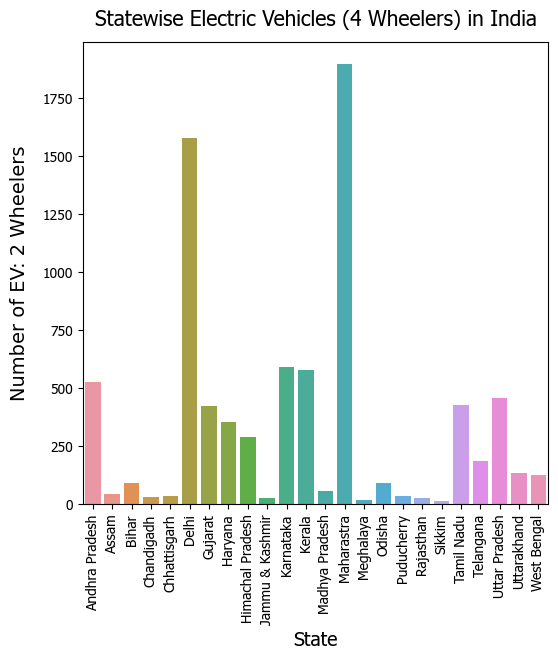

<Figure size 640x480 with 0 Axes>

In [6]:
# 4  wheelers data visualization from first dataset
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, x=df1['Region'].sort_values(ascending=True), y='4W')
plt.xlabel('State', fontsize=14, family="Tahoma")
plt.ylabel('Number of EV: 2 Wheelers', fontsize=14, labelpad=10)
plt.yticks(family='Tahoma')
plt.xticks(family='Tahoma',rotation = 'vertical')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='Tahoma', size=15, pad=12)
plt.show()
plt.savefig('4 wheelers.png')

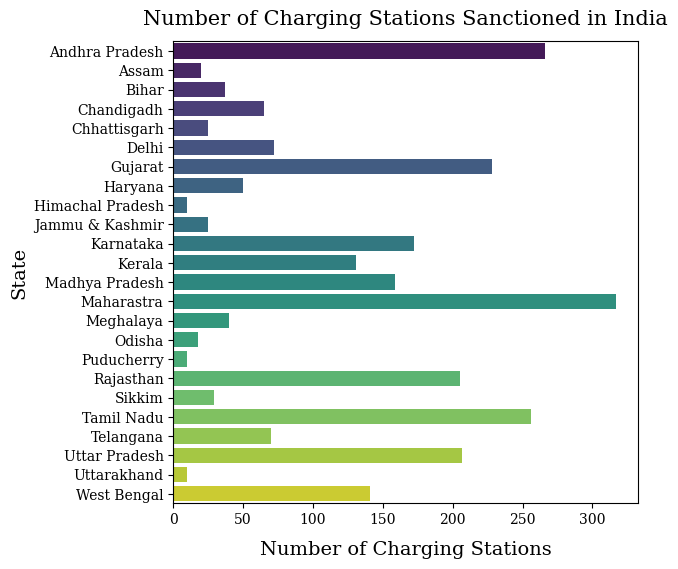

<Figure size 640x480 with 0 Axes>

In [7]:
# charging stations sanctioned visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()
plt.savefig('ChargingStation.png')

# Analysis of EVs based on brands
some of the top production EVs Brands are Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.





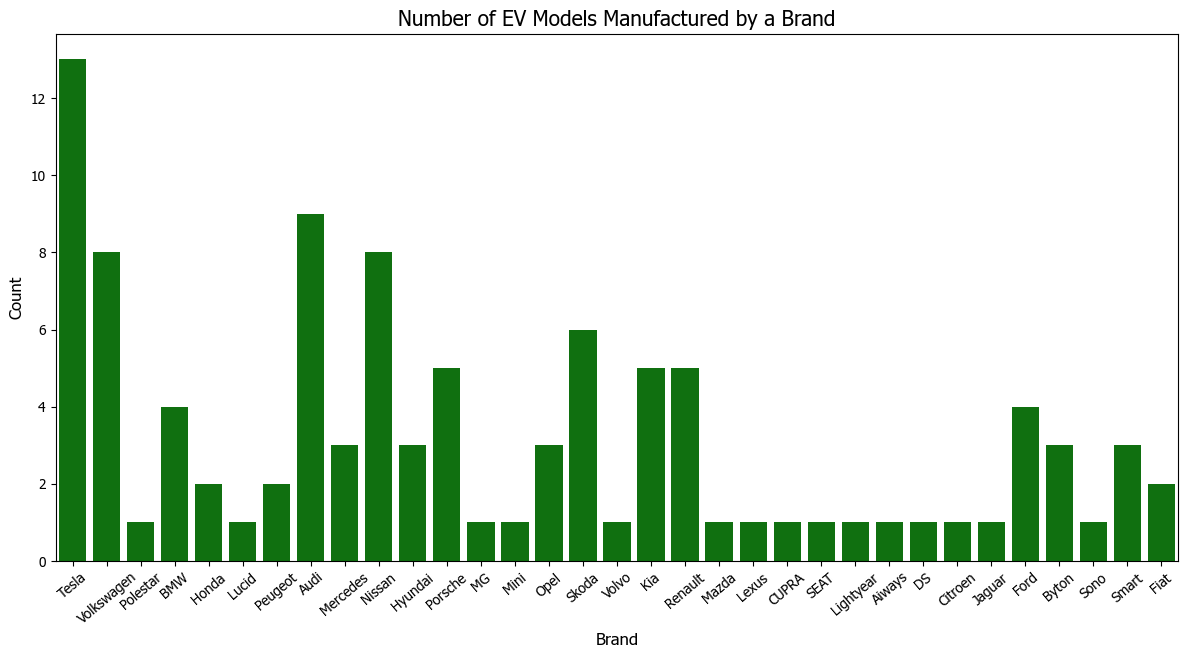

<Figure size 640x480 with 0 Axes>

In [8]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count',color = "green", height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='Tahoma', size=12)
plt.ylabel('Count', family='Tahoma', size=12)
plt.xticks(family='Tahoma')
plt.yticks(family='Tahoma')
plt.title('Number of EV Models Manufactured by a Brand', family='Tahoma', size=15)
plt.show()
plt.savefig('EV models.png')

# Analysis of different segments of EVs

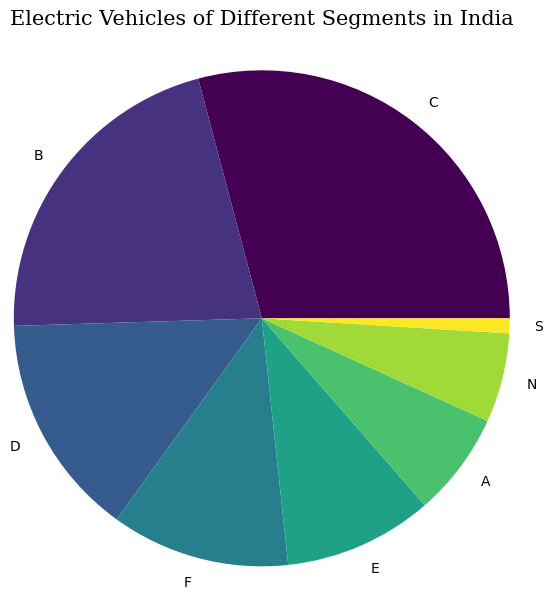

<Figure size 640x480 with 0 Axes>

In [9]:
# analysis of different segments of EVs from dataset 3
plt.figure(figsize=(4, 6))
x = df2['Segment'].value_counts().plot.pie(radius=2, cmap='viridis',   pctdistance=.5,)
# plt.pie(x=[1], radius=0.8, colors='white',)
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()
plt.savefig('different Segments.png')

# Analysis of the number of seats by each brand
The number of seats of Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

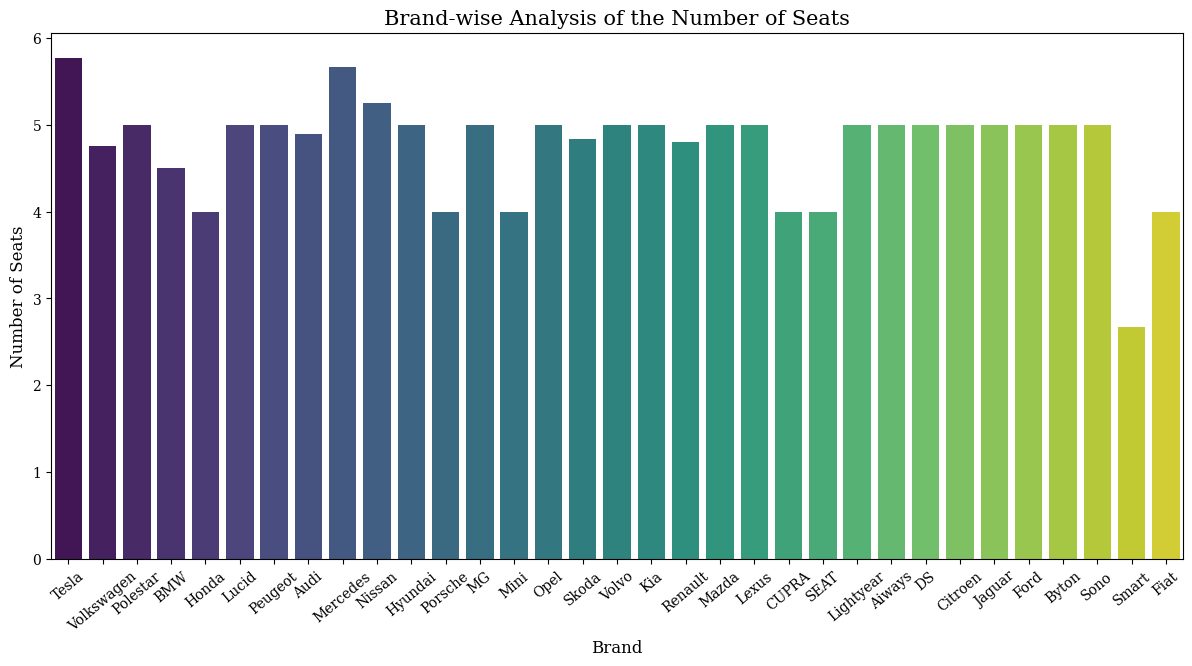

In [10]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df2, x='Brand', y='Seats', palette='viridis', errorbar=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

 #  Analysis of different plug types
 EVs with plus type of 'Type 2 CCS' seem to dominate the market.

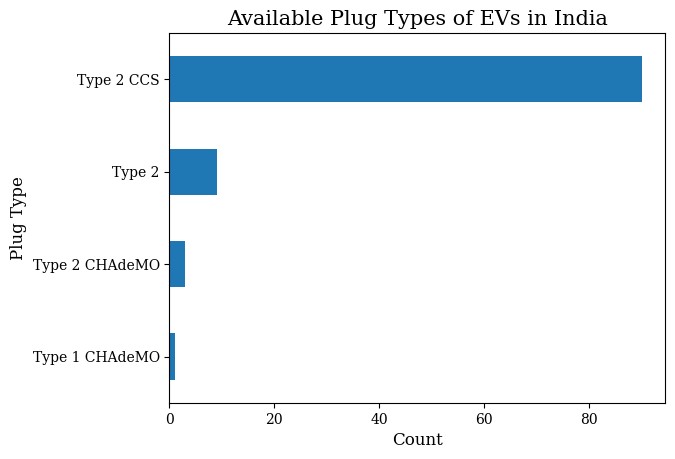

In [11]:
# plug types visualization from dataset 3
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

# Analysis of EVs based on accleration
Observation: Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.

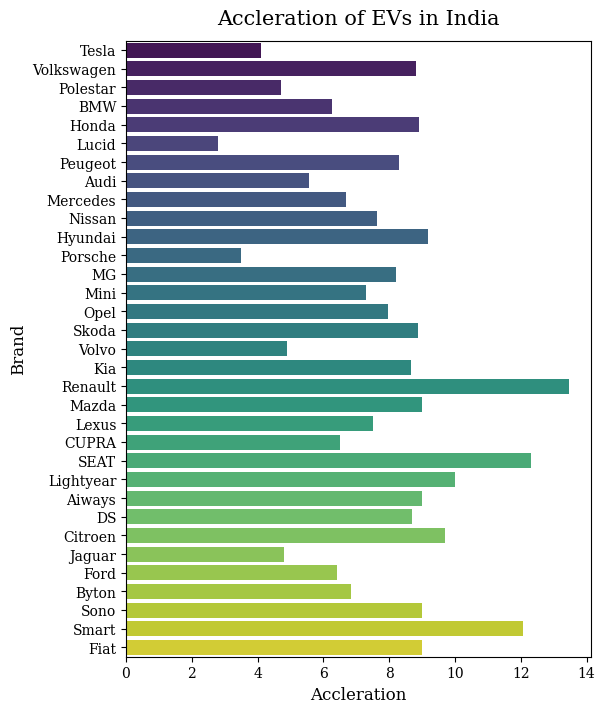

In [12]:

# accleration visualization from dataset2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='Brand', x='AccelSec', errorbar=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()
     

# Analysis of EVs based on speed
Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

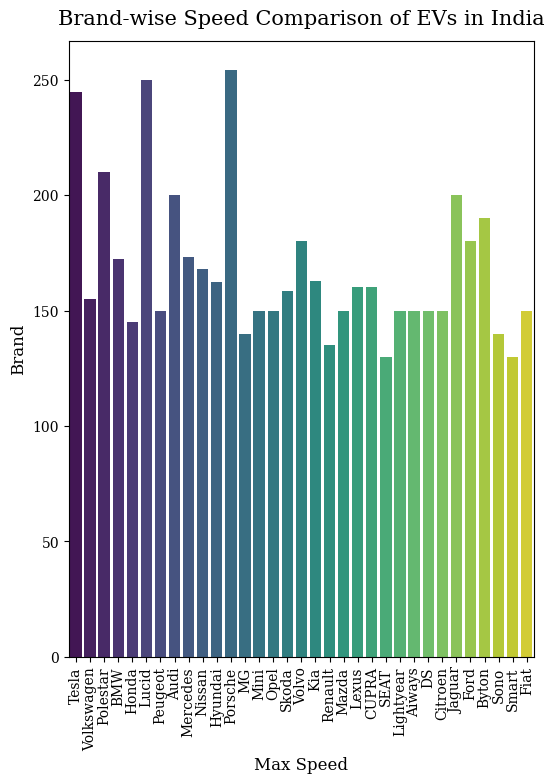

In [13]:
# speed visualization from dataset 3
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y='TopSpeed_KmH', x='Brand', errorbar=None, palette='viridis')
plt.xticks(family='serif',rotation = 'vertical')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()
     

In [21]:



# Selecting relevant numerical features
features = ["PriceEuro", "Range_Km", "Efficiency_WhKm", "FastCharge_KmH", "TopSpeed_KmH"]
df_numeric = df2[features].dropna() 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_numeric["Cluster"] = kmeans.fit_predict(scaled_features)



# Display results
print(df2[["PriceEuro", "Range_Km", "Segment"]].head())


C:\Users\jagadeesh kesamsetti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   PriceEuro  Range_Km Segment
0      55480       450       D
1      30000       270       C
2      56440       400       D
3      68040       360       D
4      32997       170       B


C:\Users\jagadeesh kesamsetti\AppData\Local\Temp\ipykernel_11712\2701359618.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


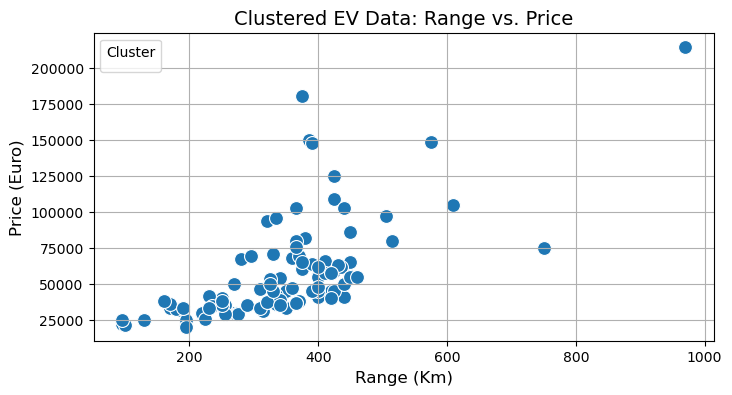

In [25]:
# Scatter plot for two features, colored by cluster
plt.figure(figsize=(8, 4))
sns.scatterplot(
    x=df2['Range_Km'],
    y=df2['PriceEuro'],
#     hue=df2['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clustered EV Data: Range vs. Price', fontsize=14)
plt.xlabel('Range (Km)', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()